In [218]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import causality as cs
from causal_impact import causal_impact as ci
import tensorflow_probability as tfp
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:20,.2f}'.format

In [12]:
people_df = pd.read_csv('data/model_one/people.csv', sep=';')

In [13]:
people_df.head(15)

,country,indicator,date,value
0,Afghanistan,Final consumption expenditure (annual % growth),1960-01-01,0.00
1,Afghanistan,"Inflation, consumer prices (annual %)",1960-01-01,0.00
2,Afghanistan,Informal employment (% of total non-agricultur...,1960-01-01,0.00
3,Albania,Final consumption expenditure (annual % growth),1960-01-01,0.00
4,Albania,"Inflation, consumer prices (annual %)",1960-01-01,0.00
5,Albania,Informal employment (% of total non-agricultur...,1960-01-01,0.00
6,Algeria,Final consumption expenditure (annual % growth),1960-01-01,0.00
7,Algeria,"Inflation, consumer prices (annual %)",1960-01-01,0.00
8,Algeria,Informal employment (% of total non-agricultur...,1960-01-01,0.00
9,American Samoa,Final consumption expenditure (annual % growth),1960-01-01,0.00


In [389]:
peoples_pivot_df = people_df.pivot_table(index='date', columns=['country', 'indicator'], values='value').interpolate().reset_index()

In [390]:
peoples_pivot_df.head(150)

country          date                          Afghanistan  \
indicator             Birth rate, crude (per 1,000 people)   
0          1960-01-01                                51.29   
1          1960-02-01                                51.30   
2          1960-03-01                                51.31   
3          1960-04-01                                51.32   
4          1960-05-01                                51.33   
5          1960-06-01                                51.34   
6          1960-07-01                                51.34   
7          1960-08-01                                51.35   
8          1960-09-01                                51.36   
9          1960-10-01                                51.37   
10         1960-11-01                                51.38   
11         1960-12-01                                51.39   
12         1961-01-01                                51.40   
13         1961-02-01                                51.40   
14         1961-03-01                                51.41   
15         1961-04-01                                51.42   
16         1961-05-01                                51.43   
17         1961-06-01                                51.43   
18         1961-07-01                                51.44   
19         1961-08-01                                51.45   
20         1961-09-01                                51.46   
21         1961-10-01                                51.46   
22         1961-11-01                                51.47   
23         1961-12-01                                51.48   
24         1962-01-01                                51.49   
25         1962-02-01                                51.49   
26         1962-03-01                                51.50   
27         1962-04-01                                51.51   
28         1962-05-01                                51.52   
29         1962-06-01                                51.52   
..                ...                                  ...   
120        1970-01-01                                51.65   
121        1970-02-01                                51.64   
122        1970-03-01                                51.64   
123        1970-04-01                                51.63   
124        1970-05-01                                51.62   
125        1970-06-01                                51.62   
126        1970-07-01                                51.61   
127        1970-08-01                                51.60   
128        1970-09-01                                51.60   
129        1970-10-01                                51.59   
130        1970-11-01                                51.58   
131        1970-12-01                                51.58   
132        1971-01-01                                51.57   
133        1971-02-01                                51.56   
134        1971-03-01                                51.55   
135        1971-04-01                                51.55   
136        1971-05-01                                51.54   
137        1971-06-01                                51.53   
138        1971-07-01                                51.52   
139        1971-08-01                                51.52   
140        1971-09-01                                51.51   
141        1971-10-01                                51.50   
142        1971-11-01                                51.49   
143        1971-12-01                                51.48   
144        1972-01-01                                51.48   
145        1972-02-01                                51.47   
146        1972-03-01                                51.46   
147        1972-04-01                                51.45   
148        1972-05-01                                51.44   
149        1972-06-01                                51.43   

country                                                               \
indicator Consumer Pr

In [350]:
brazil_multilevel_df = peoples_pivot_df[['date', 'Brazil']]
brazil_multilevel_df.columns = brazil_multilevel_df.columns.remove_unused_levels().droplevel()
brazil_df = brazil_multilevel_df.rename(columns={'': 'date'}).set_index('date')

In [351]:
brazil_df.head(15)

indicator,"Birth rate, crude (per 1,000 people)","Consumer Price Index, All items","Fertility rate, total (births per woman)",Final consumption expenditure (annual % growth),"Inflation, consumer prices (annual %)",Informal employment (% of total non-agricultural employment),"Labor Force, Persons, Number of","Life expectancy at birth, total (years)","Mortality rate, infant (per 1,000 live births)",Population ages 15-64 (% of total),Population density (people per sq. km of land area),Population growth (annual %),"Population, total",Prevalence of overweight (% of adults),Rural population (% of total population),Rural population growth (annual %),"Unemployment, Persons, Number of",Urban population growth (annual %)
date,,,,,,,,,,,,,,,,,,
1960-01-01,42.34,0.00,6.07,0.00,0.00,0.00,0.00,54.24,127.60,53.71,0.00,2.90,"72,207,554.00",0.00,53.86,1.01,0.00,5.15
1960-02-01,42.31,0.00,6.07,0.74,0.00,0.00,0.00,54.28,127.32,53.69,0.74,2.90,"72,386,238.08",0.00,53.78,1.01,0.00,5.14
1960-03-01,42.28,0.00,6.07,1.48,0.00,0.00,0.00,54.33,127.05,53.67,1.48,2.90,"72,564,922.17",0.00,53.70,1.02,0.00,5.13
1960-04-01,42.26,0.00,6.06,2.22,0.00,0.00,0.00,54.37,126.77,53.66,2.22,2.90,"72,743,606.25",0.00,53.62,1.03,0.00,5.12
1960-05-01,42.23,0.00,6.06,2.96,0.00,0.00,0.00,54.41,126.50,53.64,2.97,2.91,"72,922,290.33",0.00,53.53,1.03,0.00,5.11
1960-06-01,42.21,0.00,6.06,3.70,0.00,0.00,0.00,54.45,126.22,53.62,3.71,2.91,"73,100,974.42",0.00,53.45,1.04,0.00,5.10
1960-07-01,42.18,0.00,6.06,4.44,0.00,0.00,0.00,54.50,125.95,53.60,4.45,2.91,"73,279,658.50",0.00,53.37,1.04,0.00,5.09
1960-08-01,42.16,0.00,6.06,5.18,0.00,0.00,0.00,54.54,125.67,53.59,5.19,2.91,"73,458,342.58",0.00,53.29,1.05,0.00,5.08
1960-09-01,42.13,0.00,6.05,5.92,0.00,0.00,0.00,54.58,125.40,53.57,5.93,2.92,"73,637,026.67",0.00,53.21,1.06,0.00,5.07


In [352]:
brazil_df.loc[['date', '1984-01-01']]['Population, total']

date
date                          nan
1984-01-01         132,800,684.00
Name: Population, total, dtype: float64

In [353]:
brazil_df.columns

Index(['Birth rate, crude (per 1,000 people)',
       'Consumer Price Index, All items',
       'Fertility rate, total (births per woman)',
       'Final consumption expenditure (annual % growth)',
       'Inflation, consumer prices (annual %)',
       'Informal employment (% of total non-agricultural employment)',
       'Labor Force, Persons, Number of',
       'Life expectancy at birth, total (years)',
       'Mortality rate, infant (per 1,000 live births)',
       'Population ages 15-64 (% of total)',
       'Population density (people per sq. km of land area)',
       'Population growth (annual %)', 'Population, total',
       'Prevalence of overweight (% of adults)',
       'Rural population (% of total population)',
       'Rural population growth (annual %)',
       'Unemployment, Persons, Number of',
       'Urban population growth (annual %)'],
      dtype='object', name='indicator')

In [246]:
# years = ['%s-01-01' % y for y in list(range(1975, 2017))]
# brazil_yearly_df = brazil_df.loc[(brazil_df.index.isin(years))]

In [354]:
variable_types = { c: 'c' for c in list(brazil_df.columns.values)}
ic_algo = cs.inference.search.IC(cs.inference.independence_tests.RobustRegressionTest)

In [355]:
graph = ic_algo.search(brazil_df, variable_types)

In [356]:
graph.edges(data=True)

EdgeDataView([('Birth rate, crude (per 1,000 people)', 'Consumer Price Index, All items', {'marked': False, 'arrows': ['Birth rate, crude (per 1,000 people)', 'Consumer Price Index, All items']}), ('Birth rate, crude (per 1,000 people)', 'Fertility rate, total (births per woman)', {'marked': False, 'arrows': ['Birth rate, crude (per 1,000 people)']}), ('Consumer Price Index, All items', 'Informal employment (% of total non-agricultural employment)', {'marked': False, 'arrows': ['Consumer Price Index, All items', 'Informal employment (% of total non-agricultural employment)']}), ('Consumer Price Index, All items', 'Population ages 15-64 (% of total)', {'marked': False, 'arrows': ['Consumer Price Index, All items', 'Consumer Price Index, All items', 'Population ages 15-64 (% of total)', 'Population ages 15-64 (% of total)']}), ('Consumer Price Index, All items', 'Unemployment, Persons, Number of', {'marked': False, 'arrows': ['Consumer Price Index, All items', 'Consumer Price Index, All 

In [357]:
brazil_df.reset_index()

indicator,date,"Birth rate, crude (per 1,000 people)","Consumer Price Index, All items","Fertility rate, total (births per woman)",Final consumption expenditure (annual % growth),"Inflation, consumer prices (annual %)",Informal employment (% of total non-agricultural employment),"Labor Force, Persons, Number of","Life expectancy at birth, total (years)","Mortality rate, infant (per 1,000 live births)",Population ages 15-64 (% of total),Population density (people per sq. km of land area),Population growth (annual %),"Population, total",Prevalence of overweight (% of adults),Rural population (% of total population),Rural population growth (annual %),"Unemployment, Persons, Number of",Urban population growth (annual %)
0,1960-01-01,42.34,0.00,6.07,0.00,0.00,0.00,0.00,54.24,127.60,53.71,0.00,2.90,"72,207,554.00",0.00,53.86,1.01,0.00,5.15
1,1960-02-01,42.31,0.00,6.07,0.74,0.00,0.00,0.00,54.28,127.32,53.69,0.74,2.90,"72,386,238.08",0.00,53.78,1.01,0.00,5.14
2,1960-03-01,42.28,0.00,6.07,1.48,0.00,0.00,0.00,54.33,127.05,53.67,1.48,2.90,"72,564,922.17",0.00,53.70,1.02,0.00,5.13
3,1960-04-01,42.26,0.00,6.06,2.22,0.00,0.00,0.00,54.37,126.77,53.66,2.22,2.90,"72,743,606.25",0.00,53.62,1.03,0.00,5.12
4,1960-05-01,42.23,0.00,6.06,2.96,0.00,0.00,0.00,54.41,126.50,53.64,2.97,2.91,"72,922,290.33",0.00,53.53,1.03,0.00,5.11
5,1960-06-01,42.21,0.00,6.06,3.70,0.00,0.00,0.00,54.45,126.22,53.62,3.71,2.91,"73,100,974.42",0.00,53.45,1.04,0.00,5.10
6,1960-07-01,42.18,0.00,6.06,4.44,0.00,0.00,0.00,54.50,125.95,53.60,4.45,2.91,"73,279,658.50",0.00,53.37,1.04,0.00,5.09
7,1960-08-01,42.16,0.00,6.06,5.18,0.00,0.00,0.00,54.54,125.67,53.59,5.19,2.91,"73,458,342.58",0.00,53.29,1.05,0.00,5.08
8,1960-09-01,42.13,0.00,6.05,5.92,0.00,0.00,0.00,54.58,125.40,53.57,5.93,2.92,"73,637,026.67",0.00,53.21,1.06,0.00,5.07
9,1960-10-01,42.11,0.00,6.05,6.66,0.00,0.00,0.00,54.63,125.12,53.55,6.67,2.92,"73,815,710.75",0.00,53.12,1.06,0.00,5.06


In [358]:
brazil_reindexed_df = brazil_df.reset_index()
brazil_ci_df = brazil_reindexed_df.rename(columns={'Consumer Price Index, All items': 'y'})[['y', 'date', 'Life expectancy at birth, total (years)',
                                                                                         'Informal employment (% of total non-agricultural employment)',
                                                                                         'Urban population growth (annual %)', 'Inflation, consumer prices (annual %)',
                                                                                         'Rural population growth (annual %)', 'Prevalence of overweight (% of adults)']
                                                                                           ].set_index('date')

In [374]:
brazil_ci_df.head(15)

indicator,date,y,"Life expectancy at birth, total (years)",Informal employment (% of total non-agricultural employment),Urban population growth (annual %),"Inflation, consumer prices (annual %)",Rural population growth (annual %),Prevalence of overweight (% of adults)
0,"1,960.00",0.00,54.24,0.00,5.15,0.00,1.01,0.00
1,"1,960.00",0.00,54.28,0.00,5.14,0.00,1.01,0.00
2,"1,960.00",0.00,54.33,0.00,5.13,0.00,1.02,0.00
3,"1,960.00",0.00,54.37,0.00,5.12,0.00,1.03,0.00
4,"1,960.00",0.00,54.41,0.00,5.11,0.00,1.03,0.00
5,"1,960.00",0.00,54.45,0.00,5.10,0.00,1.04,0.00
6,"1,960.00",0.00,54.50,0.00,5.09,0.00,1.04,0.00
7,"1,960.00",0.00,54.54,0.00,5.08,0.00,1.05,0.00
8,"1,960.00",0.00,54.58,0.00,5.07,0.00,1.06,0.00
9,"1,960.00",0.00,54.63,0.00,5.06,0.00,1.06,0.00


In [360]:
brazil_ci_df.index

Index(['1960-01-01', '1960-02-01', '1960-03-01', '1960-04-01', '1960-05-01',
       '1960-06-01', '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
       ...
       '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01',
       '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01'],
      dtype='object', name='date', length=696)

In [361]:
imp = ci.CausalImpact(brazil_ci_df, '2003-01-01')
imp.run()

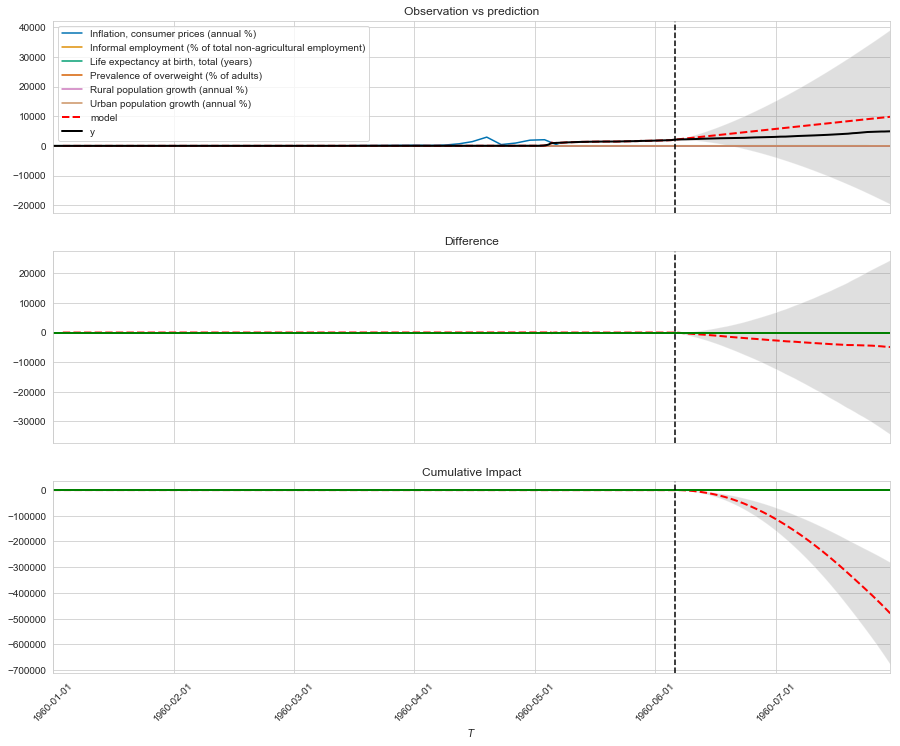

In [362]:
imp.plot()

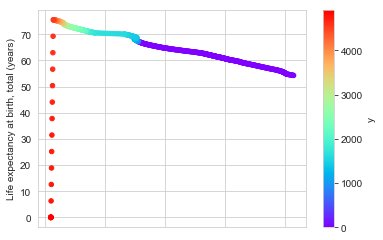

In [375]:
brazil_ci_df.plot.scatter(x="Urban population growth (annual %)", y="Life expectancy at birth, total (years)", c="y", cmap="rainbow", colorbar=True)

In [376]:
sns.set_style("whitegrid")
sns.set_palette("colorblind")

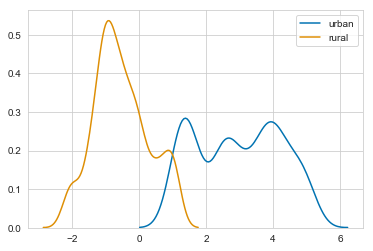

In [377]:
sns.kdeplot(brazil_ci_df['Urban population growth (annual %)'], label="urban")
sns.kdeplot(brazil_ci_df['Rural population growth (annual %)'], label="rural")

In [378]:
brazil_ci_df.reset_index(level=0, inplace=True)

In [381]:
# brazil_ci_df['date'] = brazil_ci_df['date'].map(lambda x: float(x.split('-')[0]))

In [382]:
brazil_plot_df = brazil_ci_df[['date', 'Inflation, consumer prices (annual %)']]

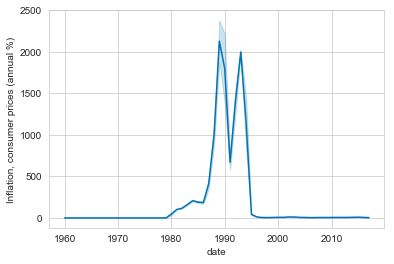

In [383]:
sns.lineplot(x='date', y='Inflation, consumer prices (annual %)', markers=True, data=brazil_plot_df)